# k-Nearest Neighbors (kNN) — Tutorial


## 1. Fundamentos de la técnica (breve resumen)

k-Nearest Neighbors (kNN) es un **clasificador supervisado basado en instancias**. Para clasificar una muestra nueva, kNN:
1. Calcula la distancia entre la muestra y todas las muestras del conjunto de entrenamiento.
2. Selecciona las *k* muestras más cercanas (los *k* vecinos).
3. Asigna la clase mediante **votación mayoritaria** entre esos vecinos.

kNN no entrena un modelo paramétrico: almacena el dataset y realiza cálculos en la predicción (lazy learning).

---

## 2. Modelo matemático (resumen con fórmulas)

- Distancia Euclidiana entre dos puntos $x = (x_1,\dots,x_d)$ y $x' = (x'_1,\dots,x'_d):$

$$d(x, x') = \sqrt{\sum_{i=1}^{d} (x_i - x'_i)^2}$$

- Regla de decisión (votación mayoritaria): la predicción $\hat{y}$ para un punto \(x\) es

$$
\hat{y} = \operatorname{mode}\{ y^{(i)} : x^{(i)} \in N_k(x)\}
$$

donde $N_k(x)$ son los *k* vecinos más cercanos y $y^{(i)}$ sus etiquetas.

---

## 3. Librerías, clases y funciones (breve)

Vamos a usar `scikit-learn` y `matplotlib`:

- `from sklearn.neighbors import KNeighborsClassifier` — clase kNN.
- `from sklearn.model_selection import train_test_split` — dividir datos.
- `from sklearn.preprocessing import StandardScaler` — normalizar características.
- `from sklearn.metrics import confusion_matrix, accuracy_score` — evaluación.
- `matplotlib.pyplot` — graficar scatter y matriz de confusión.

---

## 4. Pipeline

A continuación, código y pequeñas explicaciones. Pega cada bloque en una celda de código.


In [1]:
# ===========================
# Bloque 1: Importaciones
# ===========================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# ===========================
# Bloque 2: Cargar dataset y seleccionar
# ===========================
# Usamos Iris por ser simple y didáctico.
iris = load_iris()
X_full = iris.data      # 4 características
y_full = iris.target    # 3 clases

# Para simplificar y ver bien el scatter: tomamos 2 clases (0 y 1) y 2 features
mask = y_full != 2              # quitar la clase 2 (Iris-virginica)
X = X_full[mask, :2]            # usar solo sepal length y sepal width
y = y_full[mask]

feature_names = iris.feature_names[:2]
print("Feature names:", feature_names)
print("Shape X:", X.shape, "Shape y:", y.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)']
Shape X: (100, 2) Shape y: (100,)


Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),label
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,0.500000
std,0.641698,0.478739,0.502519
min,4.300000,2.000000,0.000000
25%,5.000000,2.800000,0.000000
50%,5.400000,3.050000,0.500000
75%,5.900000,3.400000,1.000000
max,7.000000,4.400000,1.000000


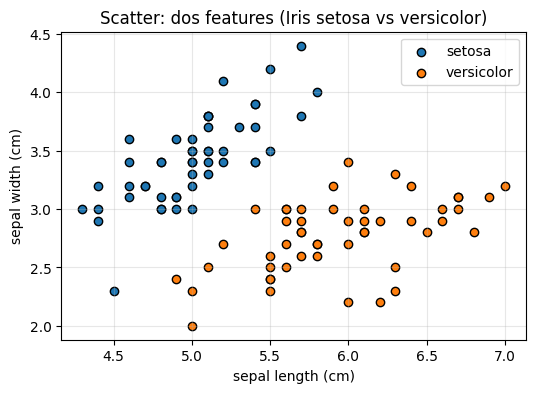

In [3]:
# ===========================
# Bloque 3: Preprocesamiento (estadísticas básicas y scatter)
# ===========================
import pandas as pd

df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

# Estadísticas básicas
print("Estadísticas descriptivas:")
display(df.describe())

# Scatter plot (dos features)
plt.figure(figsize=(6,4))
for label in np.unique(y):
    plt.scatter(df[df['label']==label].iloc[:,0],
                df[df['label']==label].iloc[:,1],
                label=iris.target_names[label],
                edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Scatter: dos features (Iris setosa vs versicolor)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# ===========================
# Bloque 4: Feature Engineering (breve explicación y selección)
# ===========================
# En este ejemplo simple:
# - Elegimos las dos primeras variables (sepal length, sepal width) porque facilitan visualización.
# - En problemas reales, se selecciona por: correlacion con la etiqueta, información mutua,
#   importancia de features, entendimiento del dominio, o mediante métodos automáticos (PCA, selección).
#
# Aquí no creamos nuevas features; solo normalizamos.


In [4]:
# ===========================
# Bloque 5: Dividir datos y normalizar
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("Tamaños: ", X_train_s.shape, X_test_s.shape)

Tamaños:  (70, 2) (30, 2)


In [5]:
# ===========================
# Bloque 6: Entrenar kNN (modelo)
# ===========================
# Par de hiperparámetros a ajustar: k (n_neighbors), y la métrica (por defecto euclidiana).
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_s, y_train)
print(f"Modelo kNN entrenado con k={k}")

Modelo kNN entrenado con k=3


In [6]:
# ===========================
# Bloque 7: Función de predicción para un patrón dado
# ===========================
def clasificar_patron(patron_raw, model, scaler, feature_names):
    """
    patron_raw: array-like de longitud 2 (sin escalar)
    model: modelo kNN entrenado
    scaler: StandardScaler ya ajustado
    """
    x = np.array(patron_raw).reshape(1, -1)
    x_s = scaler.transform(x)
    pred = model.predict(x_s)[0]
    # Probabilidades opcionales (kNN puede dar proporción de votos)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(x_s)[0]
    else:
        probs = None
    print("Entrada (raw):", dict(zip(feature_names, x.flatten().tolist())))
    print("Clase predicha:", iris.target_names[pred])
    if probs is not None:
        print("Probabilidades por clase:", {iris.target_names[i]: float(probs[i]) for i in range(len(probs))})
    return pred

# Ejemplo de uso:
ejemplo = X_test[0]
clasificar_patron(ejemplo, model, scaler, feature_names)

Entrada (raw): {'sepal length (cm)': 4.4, 'sepal width (cm)': 3.0}
Clase predicha: setosa
Probabilidades por clase: {np.str_('setosa'): 1.0, np.str_('versicolor'): 0.0}


np.int64(0)

Accuracy (test): 100.00%
Matriz de confusión (filas=verdaderas, columnas=predichas):
[[15  0]
 [ 0 15]]


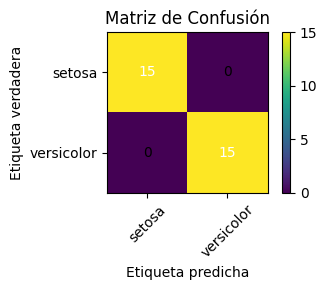

In [7]:
# ===========================
# Bloque 8: Evaluación — Predicción, Matriz de Confusión y Accuracy
# ===========================
# Predicciones sobre test
y_pred = model.predict(X_test_s)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy (test):", f"{acc*100:.2f}%")
print("Matriz de confusión (filas=verdaderas, columnas=predichas):")
print(cm)

# Mostrar matriz como heatmap sencillo
plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest')
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0,1], iris.target_names[:2], rotation=45)
plt.yticks([0,1], iris.target_names[:2])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='white' if cm[i,j]>cm.max()/2 else 'black')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.tight_layout()
plt.show()

## 5. Referencias bibliográficas

- Cover, T., & Hart, P. (1967). *Nearest neighbor pattern classification*. IEEE Transactions on Information Theory.  
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.  
- Scikit-learn documentation: `KNeighborsClassifier` — https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
